### Medical Insurance Prediction

In [118]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [119]:
# Loading the dataset
insurance_data = pd.read_csv('/content/insurance.csv')

In [120]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [121]:
insurance_data.shape

(1338, 7)

In [122]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Catergorical Features

1. Sex
2. Somker
3. Region


In [123]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [124]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [125]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [126]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [127]:
# Data Analysis
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

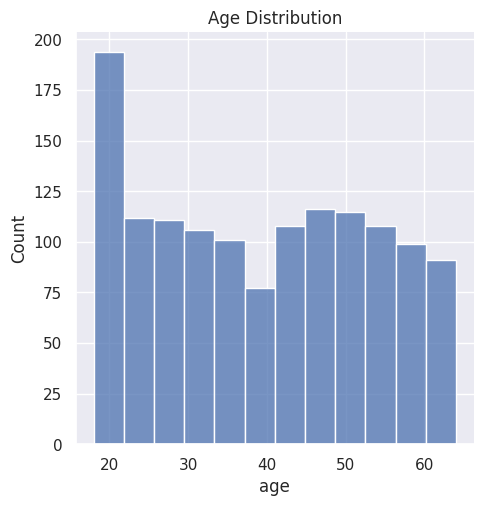

In [128]:
plt.figure(figsize=(6,6))
sns.displot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

Encoding the numerical value

In [129]:
insurance_data.replace({'sex':{'male':1,'female':0}},inplace=True)

In [130]:
insurance_data.replace({'smoker':{'yes':1,'no':0}},inplace=True)

In [131]:
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [132]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


Spliting the test data and training data

In [133]:
x=insurance_data.drop(columns='charges',axis=1)
y=insurance_data['charges']

In [134]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2,random_state=2)

Model training

In [135]:
#Lineaar Regression
model =LinearRegression()

In [136]:
model.fit(xtrain,ytrain)

LinearRegression()

Model Evaluation

In [137]:
training_prediction = model.predict(xtrain)

In [138]:
# R squared value
r2_train = metrics.r2_score(ytrain,training_prediction)
print('R squared vale',r2_train)

R squared vale 0.751505643411174


In [139]:
testing_prediction = model.predict(xtest)

In [140]:
# R squared value
r2_test = metrics.r2_score(ytest,testing_prediction)
print('R squared vale',r2_test)

R squared vale 0.7447273869684076


Making a predictive system

In [141]:
input_data=(31,0,25.74,0,0,1)

# changing input_data to numpay array
input_array=np.asarray(input_data)

# reshaping the array
input_data_reshaped = input_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction[0])

3972.3030037793797


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
